In [1]:
from qiskit import *
import numpy as np
%matplotlib inline
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit import IBMQ

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

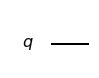

In [3]:
#How do we represent these things as circuits?
#Read left to right in time
#Qiskit initializes every qubit into |0>
circuit = QuantumCircuit(1) #Create a quantum circuit of 1 qubit and 1 classical circuit for measurement
circuit.draw(output = 'mpl')  #The output command just makes the circuit drawing look nicer,

In [4]:
q1 = QuantumRegister(1)

In [5]:
qc = QuantumCircuit(q1)

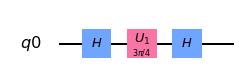

In [6]:
# Add a H gate on qubit 0, putting this qubit in superposition.
qc.h(0)
# Add a phase-shift gate 
qc.u1(3*np.pi/4,q1)
# Add another H gate
qc.h(0)
# Draw the circuit
qc.draw(output = 'mpl')  #The output command just makes the circuit drawing look nicer,

In [7]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.383+0.j   , -0.   -0.924j],
       [-0.   -0.924j,  0.383-0.j   ]])

In [12]:
np.cos(-np.pi/8)

0.9238795325112867

In [ ]:
simulator = Aer.get_backend('statevector_simulator') #aer is one of Qiskit's builtin simulators, we're calling the statevector simulator
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [ ]:
#In order to get to the |1> state, we need to perform a single qubit gate
#Single qubit gates act on single qubits in a similar way to classical NOT gates
#The analog for the NOT gate is the X gate
circuit = QuantumCircuit(1,1)
circuit.y(0)
circuit.draw(output = 'mpl')

In [ ]:
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)